In [1]:
#Import basic libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [18]:
#Read in the data into a pandas dataframe.
data = pd.read_csv('Solar_Flares_Dataset.csv')
data

,modified Zurich class,largest spot size,spot distribution,Activity,Evolution,Previous 24 hour flare activity code,Historically-complex,Did region become historically complex on this pass across the sun's disk,Area,. Area of the largest spot,C-Class Flares,M-class flares,X-class flares
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,H,S,X,1,2,1,1,1,1,1,0,0,0
1062,H,S,X,2,2,1,1,2,1,1,0,0,0
1063,C,S,O,1,2,1,2,2,1,1,0,0,0
1064,H,R,X,1,2,1,1,2,1,1,0,0,0


In [19]:
#Explor Data 
#Check basic metadata.
print('-------------1--------------')
print('data Shape')
print(data.shape)
print('-------------------------------------------------------------')
print('-------------2--------------')
print('data general information')
print(data.info())
print('-------------------------------------------------------------')
print('-------------3--------------')
print('Are there any variables with missing data in Data?')
print(data.isnull().any().any())
print('-------------------------------------------------------------')
print('-------------4--------------')
print('How balanced are the target, i.e. how common are 0 ..?')
print(data['C-Class Flares'].value_counts())
print('-------------------------------------------------------------')

-------------1--------------
data Shape
(1066, 13)
-------------------------------------------------------------
-------------2--------------
data general information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 13 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   modified Zurich class                                                      1066 non-null   object
 1   largest spot size                                                          1066 non-null   object
 2   spot distribution                                                          1066 non-null   object
 3    Activity                                                                  1066 non-null   int64 
 4   Evolution                                                                  1066 non-null   int64 
 5   

In [20]:
# replace object to int 
ord=OrdinalEncoder()
data['modified Zurich class']=ord.fit_transform(data[['modified Zurich class']])
data['largest spot size']=ord.fit_transform(data[['largest spot size']])
data['spot distribution']=ord.fit_transform(data[['spot distribution']])

In [21]:
data ["sum"]= data['C-Class Flares'] + data['M-class flares\xa0']+data['X-class flares']
data['sum']=data['sum'].astype(bool).astype(int)
data.head()

,modified Zurich class,largest spot size,spot distribution,Activity,Evolution,Previous 24 hour flare activity code,Historically-complex,Did region become historically complex on this pass across the sun's disk,Area,. Area of the largest spot,C-Class Flares,M-class flares,X-class flares,sum
0,5.0,0.0,3.0,1,3,1,1,1,1,1,0,0,0,0
1,2.0,3.0,2.0,1,3,1,1,2,1,1,0,0,0,0
2,1.0,4.0,2.0,1,3,1,1,2,1,1,0,0,0,0
3,5.0,3.0,3.0,1,2,1,1,1,1,1,0,0,0,0
4,5.0,4.0,3.0,1,1,1,1,2,1,1,0,0,0,0


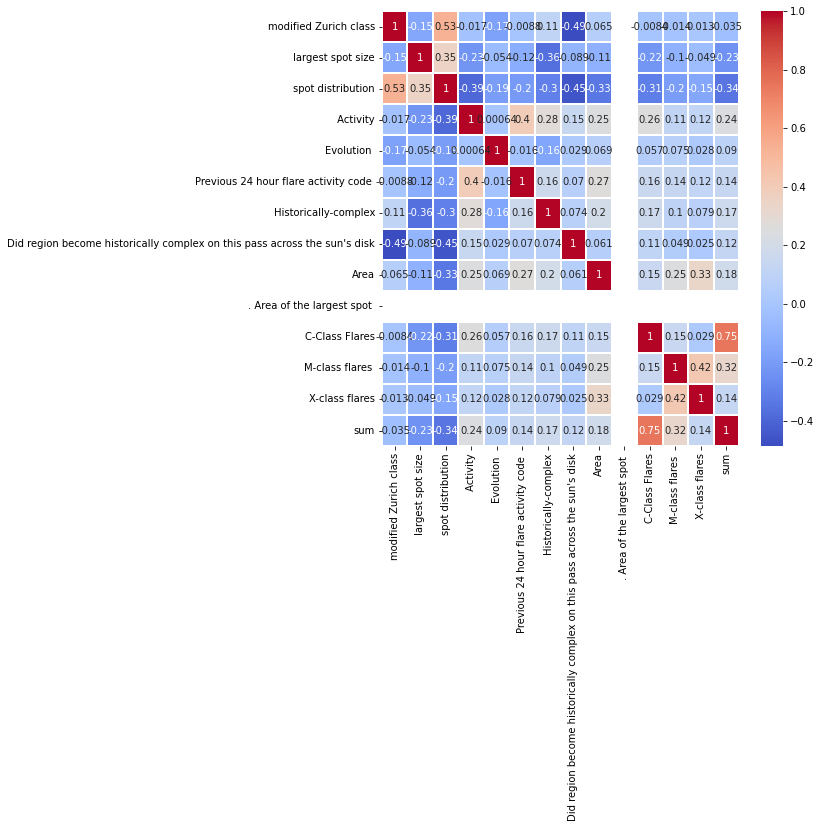

In [28]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linecolor='white', linewidths=1)

In [23]:
data.to_csv('Solar.csv', index=True,)

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif
#Train/Test Split
# First split the data into features and response variable
X = data.drop(labels='sum', axis=1) # Features
y = data.loc[:,'sum']               # Response
# create the feature selection transformer
# create the feature selection transformer
transformer = SelectKBest(score_func=f_classif, k=8)

# fit the transformer to the data and target
transformer.fit(X, y)

# get a boolean mask of the selected features
mask = transformer.get_support()

# print the indices of the selected features
print(mask)

[False  True  True  True False  True  True False  True False  True  True
 False]


/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [34]:
X = data.drop(labels=['sum','modified Zurich class'],axis=1) # Features
y = data.loc[:,'sum'] 

#We'll use a test size of 30%.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
print('The shape of training data')
print(X_train.shape)
print('The shape of testing data')
print(X_test.shape)

The shape of training data
(852, 12)
The shape of testing data
(214, 12)


In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report #untuk confusion matrix
from sklearn.tree import DecisionTreeClassifier #untuk model decision tree
from sklearn import neighbors
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# training a model KNN
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_predicted = classifier.predict(X_test)

In [37]:
print('========================== Model Test Results ========================' "\n")
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics  

accuracy = metrics.accuracy_score(y_test, classifier.predict(X_test))
confusion_matrix = metrics.confusion_matrix(y_test, classifier.predict(X_test))
classification = metrics.classification_report(y_test, classifier.predict(X_test))

print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
print()
print("Confusion Matrix:" "\n", confusion_matrix)
print()
print("Classification Report:" "\n", classification)
print()

========================== Model Test Results ========================

Model Accuracy:  98.1%

Confusion Matrix:
 [[174   0]
 [  4  36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       174
           1       1.00      0.90      0.95        40

    accuracy                           0.98       214
   macro avg       0.99      0.95      0.97       214
weighted avg       0.98      0.98      0.98       214




In [39]:
# training a model DT
ros_model =DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=5, min_samples_leaf=5)
ros_model.fit(X_train, y_train)
y_ros = ros_model.predict(X_test)
fold_acc_KNN = metrics.accuracy_score(y_test, y_ros)
print(" acc is:", fold_acc_KNN)

 acc is: 1.0


In [40]:
print('========================== Model Test Results ========================' "\n")
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn import metrics


accuracy = metrics.accuracy_score(y_test, ros_model.predict(X_test))
confusion_matrix = metrics.confusion_matrix(y_test, ros_model.predict(X_test))
classification = metrics.classification_report(y_test, ros_model.predict(X_test))

print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
print()
print("Confusion Matrix:" "\n", confusion_matrix)
print()
print("Classification Report:" "\n", classification)
print()

========================== Model Test Results ========================

Model Accuracy:  100.0%

Confusion Matrix:
 [[174   0]
 [  0  40]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00        40

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214


